In [1]:
#导入模块
import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


In [2]:
#导入数据
df = pd.read_csv("tianchi_mobile_recommend_train_user.csv")


In [3]:
#查看表数据
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [4]:
#查看表结构
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [5]:
#查看重复值
df.duplicated().sum()

4092866

In [6]:
#删除重复值
df.drop_duplicates(inplace=True)

In [7]:
#查看空值
df.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [8]:
# 缺失值均为地理信息，对用户行为分析无影响，不做处理
df.drop('user_geohash',axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164040 entries, 0 to 12256904
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   item_category  int64 
 4   time           object
dtypes: int64(4), object(1)
memory usage: 373.7+ MB


In [10]:
#设置时间
df['date'] = pd.to_datetime(df['time']).dt.date
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time']).dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164040 entries, 0 to 12256904
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  int64         
 3   item_category  int64         
 4   time           object        
 5   date           datetime64[ns]
 6   hour           int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 498.3+ MB


In [12]:
#删除
df.drop(labels='time',inplace=True,axis=1)

In [13]:
#重新设置索引
df.reset_index(drop=True,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164040 entries, 0 to 8164039
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  int64         
 3   item_category  int64         
 4   date           datetime64[ns]
 5   hour           int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 373.7 MB


In [15]:
df.head()

,user_id,item_id,behavior_type,item_category,date,hour
0,98047837,232431562,1,4245,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16,21


活跃度

In [16]:
#日活跃量
day_amount = df.groupby(by='date')["user_id"].count().sort_values()
day_amount.max()

479388

<AxesSubplot:xlabel='date'>

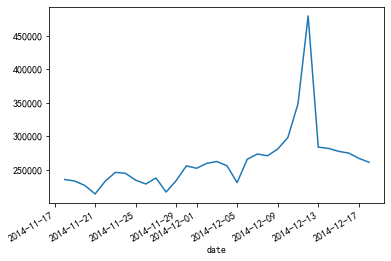

In [17]:
day_amount.plot()

    通过折现图总体趋势来看,双十二前几天的访问量明显有增加,12月1号就开始有增长的趋势,有预热活动的促进,双十二这一天日活跃量最高达到346464,双十二之后访问量立马下调。

In [18]:
#用户活跃量
day_amount2 = df.groupby(by='date')["user_id"].nunique().sort_values()

In [19]:
#最高一天用户
day_amount2.max()

7720

<AxesSubplot:xlabel='date'>

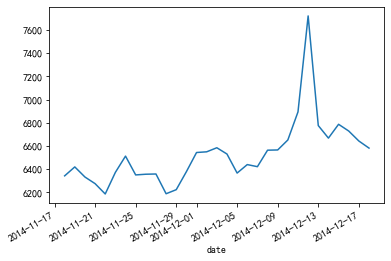

In [20]:
day_amount2.plot()

In [21]:
#平均每个用户日活跃量
day_avg = day_amount/day_amount2
day_avg.sort_values(ascending=False)

date
2014-12-12    62.096891
2014-12-11    50.531477
2014-12-10    44.791942
2014-12-09    42.776119
2014-12-07    42.582217
2014-12-14    42.275795
2014-12-13    41.865112
2014-12-08    41.261731
2014-12-06    41.258696
2014-12-15    40.881980
2014-12-16    40.853470
2014-12-17    40.194641
2014-11-30    40.109892
2014-12-03    39.830220
2014-12-18    39.682012
2014-12-02    39.621374
2014-12-04    39.193385
2014-11-23    38.620430
2014-12-01    38.534688
2014-11-22    37.658639
2014-11-29    37.581780
2014-11-24    37.567788
2014-11-27    37.397075
2014-11-18    37.126439
2014-11-25    36.924106
2014-11-19    36.315265
2014-12-05    36.259934
2014-11-26    35.989932
2014-11-20    35.768672
2014-11-28    35.025529
2014-11-21    34.081262
Name: user_id, dtype: float64

In [22]:
#提取双十二用户情况
double_day = df.loc[df["date"] == "2014-12-12"]

分析双十二:
    1.每小时访问量
    2.每小时用户活跃数
    3.平均每小时人均访问量

<AxesSubplot:xlabel='hour'>

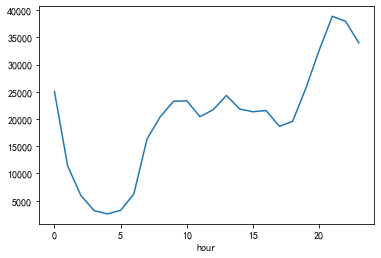

In [23]:
#每小时访问量
double_pv = double_day.groupby(by='hour')["user_id"].count()
double_pv.plot(kind='line')

<AxesSubplot:xlabel='hour'>

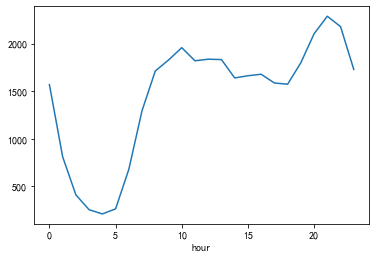

In [24]:
#每小时用户活跃数
double_uv = double_day.groupby(by='hour')["user_id"].nunique()
double_uv.plot(kind='line')

<AxesSubplot:xlabel='hour'>

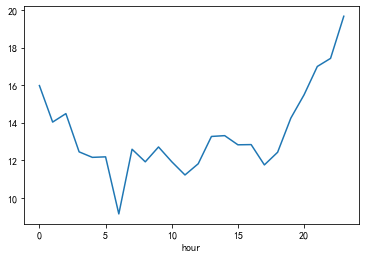

In [25]:
#平均每小时用户访问数
double_a = double_pv/double_uv
double_a.plot()

            结论:晚上18点到晚上0访问数逐渐上升，0点到达顶峰访问达到16次，这段时间为下班时间。0点到7点之间逐渐下降,五点到七点之间客流量很少少于10次
            建议:晚上18到0点期间加大力度进行商品推广促销

In [26]:
#行为访问量
activity_pv = df.pivot_table(index="date",columns="behavior_type",aggfunc="size")
activity_pv.head()

behavior_type,1,2,3,4
date,,,,
2014-11-18,215480,6797,9800,3416
2014-11-19,213108,7079,9607,3350
2014-11-20,206740,7063,9552,3168
2014-11-21,196121,6722,8328,2723
2014-11-22,213292,7001,9493,3208


In [27]:
#点击、收藏、加购物车、支付
activity_pv.columns = ["点击","收藏","加购物车","支付"]
activity_pv.head()

,点击,收藏,加购物车,支付
date,,,,
2014-11-18,215480,6797,9800,3416
2014-11-19,213108,7079,9607,3350
2014-11-20,206740,7063,9552,3168
2014-11-21,196121,6722,8328,2723
2014-11-22,213292,7001,9493,3208


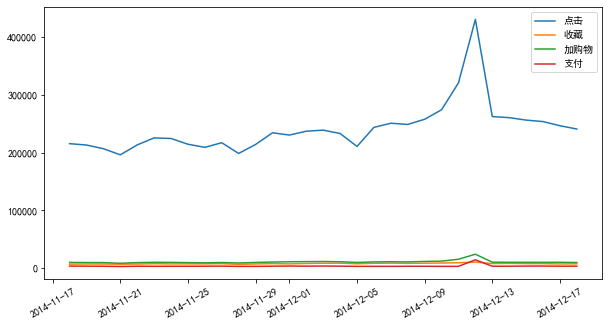

In [28]:
plt.figure(figsize=(10,5))
plt.plot(activity_pv.index,activity_pv["点击"],label="点击")
plt.plot(activity_pv.index,activity_pv["收藏"],label="收藏")
plt.plot(activity_pv.index,activity_pv["加购物车"],label="加购物")
plt.plot(activity_pv.index,activity_pv["支付"],label="支付")
plt.legend(loc="upper right")
k = plt.xticks(rotation=30)

- 结论
    - 在双十二这一天点击、收藏、加购物、支付四种行为访问量最高，可以观察到的是支付量在双十二这一天高于收藏量,说明用户可能存在冲动消费或者凑单的行为或者活动促进了用户的购买。
        

In [29]:
#点击量
dianji = activity_pv["点击"].sum()
#收藏
shoucang = activity_pv["收藏"].sum()
#购物车
gouwu = activity_pv["加购物车"].sum()
#支付
zhifu = activity_pv["支付"].sum()
#统计
df["behavior_type"].value_counts()

1    7479078
3     333371
2     240919
4     110672
Name: behavior_type, dtype: int64

In [30]:
#制作表
activity_df = pd.DataFrame(data=[dianji,shoucang,gouwu,zhifu],index=["点击","收藏","加购物车","支付"])
activity_df.columns = ["访问量"]
activity_df

,访问量
点击,7479078
收藏,240919
加购物车,333371
支付,110672


In [31]:
#单一转换率
activity_df["单一环节转化率%"] = activity_df["访问量"]/activity_df["访问量"].shift(1)*100
activity_df = activity_df.fillna(value=100)
activity_df

,访问量,单一环节转化率%
点击,7479078,100.000000
收藏,240919,3.221239
加购物车,333371,138.374723
支付,110672,33.197849


In [32]:
#整体转换率
activity_df["整体环节转化率%"] = activity_df["访问量"]/activity_df.iloc[0,0]*100
activity_df

,访问量,单一环节转化率%,整体环节转化率%
点击,7479078,100.000000,100.000000
收藏,240919,3.221239,3.221239
加购物车,333371,138.374723,4.457381
支付,110672,33.197849,1.479755


In [33]:
#每一环节流失率
activity_df["单一环节流失率%"] = 100 - activity_df["单一环节转化率%"]
activity_df

,访问量,单一环节转化率%,整体环节转化率%,单一环节流失率%
点击,7479078,100.000000,100.000000,0.000000
收藏,240919,3.221239,3.221239,96.778761
加购物车,333371,138.374723,4.457381,-38.374723
支付,110672,33.197849,1.479755,66.802151


- 点击到收藏的流失率特别高，高达96%,说明很多用户对商品不感兴趣。收藏到加购的转化率有所提升转化率为138%，说明用户为了买自己喜欢的产品，也会进行加购凑单，或者加购了同类型的其他附属产品。或者用户直接跳过了收藏这个步骤，进行加购操作。
- 购物车到支付的流失率为66%

In [34]:
#整体转化率的漏斗转化图
from pyecharts.charts import Funnel
from pyecharts import options as opts
funnel = Funnel().add(
                series_name = '整体转化率(%)',
                data_pair = [ list(z) for z in zip(activity_df.index,activity_df['整体环节转化率%']) ],
                is_selected = True,
                label_opts = opts.LabelOpts(position = 'inside')
                )
funnel.set_series_opts(tooltip_opts = opts.TooltipOpts(formatter = '{a}<br/>{b}:{c}%'))
funnel.set_global_opts(title_opts = opts.TitleOpts(title = '整体转化率(%)') )
funnel.render_notebook()

In [36]:
#用户生命周期
life = df.groupby(by='user_id')["date"].max() - df.groupby(by='user_id')["date"].min()
life_a = life.mean()

In [41]:
life_a

Timedelta('26 days 20:20:32.640000')

- 用户平均生命周期为26天（一个月内）
